# TITANIC SURVIVAL PREDICTION

# Project Description

The Titanic Survival prediction Model is a classic beginner project aimed at utiizing machine 
learning techniques to  predict whether a passenger on the Titanic Survived or not.

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C:\Users\rajat\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\rajat\AppData\Local\Temp\ipykernel_20300\1200527171.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was too old on your system - pyarrow 10.0.1 is the current minimum supported version as of this release.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required 

In [2]:
#Read file
titanic_data = pd.read_csv('Titanic-Dataset.csv')
#check the first five row
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#check the shape of the dataset
titanic_data.shape

(891, 12)

In [4]:
#check the info of the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#check the dulication in data
titanic_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [6]:
#check the null values in the data
titanic_data.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# Handling the missing values

In [7]:
#drop the Cabin column from the dataset
titanic_data = titanic_data.drop(columns = 'Cabin', axis = 1)

In [8]:
#finding the mode values of Embarked columns
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [9]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

C:\Users\rajat\AppData\Local\Temp\ipykernel_9840\3993763136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


In [10]:
# handling numerical value using train_split algorithm
X = titanic_data.drop(columns = ['PassengerId','Ticket','Survived'],axis = 1)
y = titanic_data['Survived']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [12]:
X_train['Age']

30     40.0
10      4.0
873    47.0
182     9.0
876    20.0
       ... 
534    30.0
584     NaN
493    71.0
527     NaN
168     NaN
Name: Age, Length: 712, dtype: float64

In [13]:
y_train

30     0
10     1
873    0
182    0
876    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 712, dtype: int64

In [14]:
#Imputed the age
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [15]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\rajat\AppData\Local\Temp\ipykernel_9840\3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
C:

C:\Users\rajat\AppData\Local\Temp\ipykernel_9840\3525214114.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\rajat\AppData\Local\Temp\ipykernel_9840\3525214114.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['A

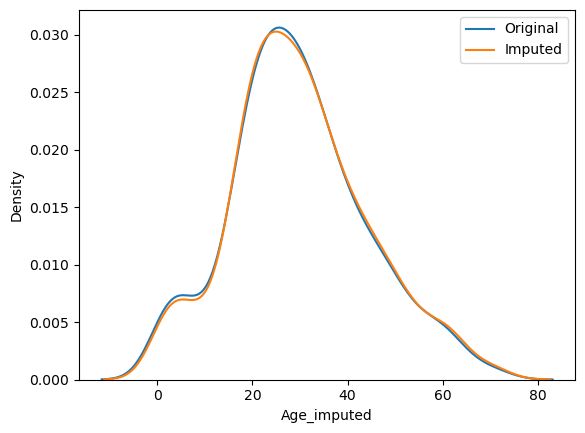

In [16]:
#Check the difference original or imputed data
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [17]:
#check the original variance and imputed variance
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  206.1450747032981


In [18]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,51.267383
Age,71.512440,204.349513,204.349513
Age_imputed,51.267383,204.349513,206.145075


<AxesSubplot: >

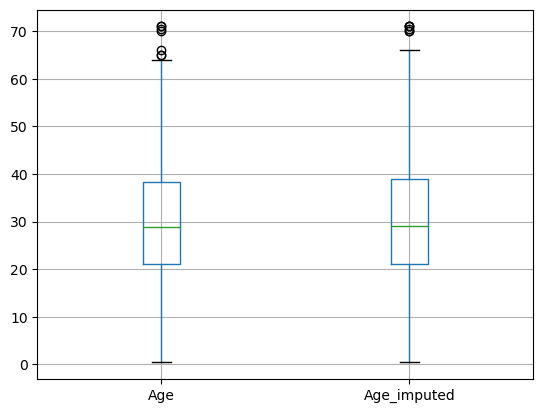

In [19]:
#check the outlier in the age or imputed age
X_train[['Age', 'Age_imputed']].boxplot()

In [20]:
#drop the columns of age
X_train = X_train.drop(columns = 'Age', axis = 1)

In [21]:
#check the null values
X_train.isnull().sum()

Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Age_imputed    0
dtype: int64

# Data Analysis

<AxesSubplot: xlabel='Sex', ylabel='Age_imputed'>

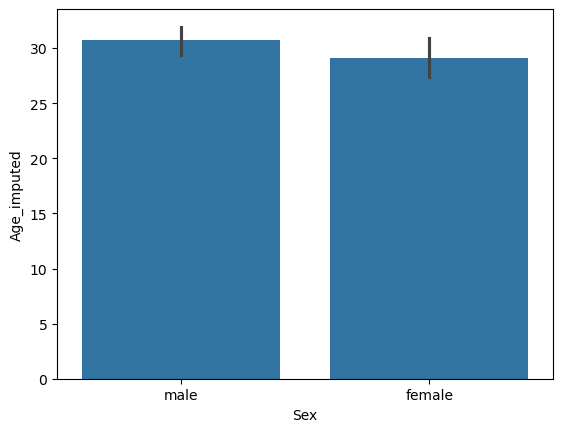

In [22]:
sns.barplot(x = X_train['Sex'], y = X_train['Age_imputed'])

C:\Users\rajat\AppData\Local\Temp\ipykernel_9840\2212770199.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'], color = 'g')
C:\Users\rajat\AppData\Local\Temp\ipykernel_9840\2212770199.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'], color = 'g')


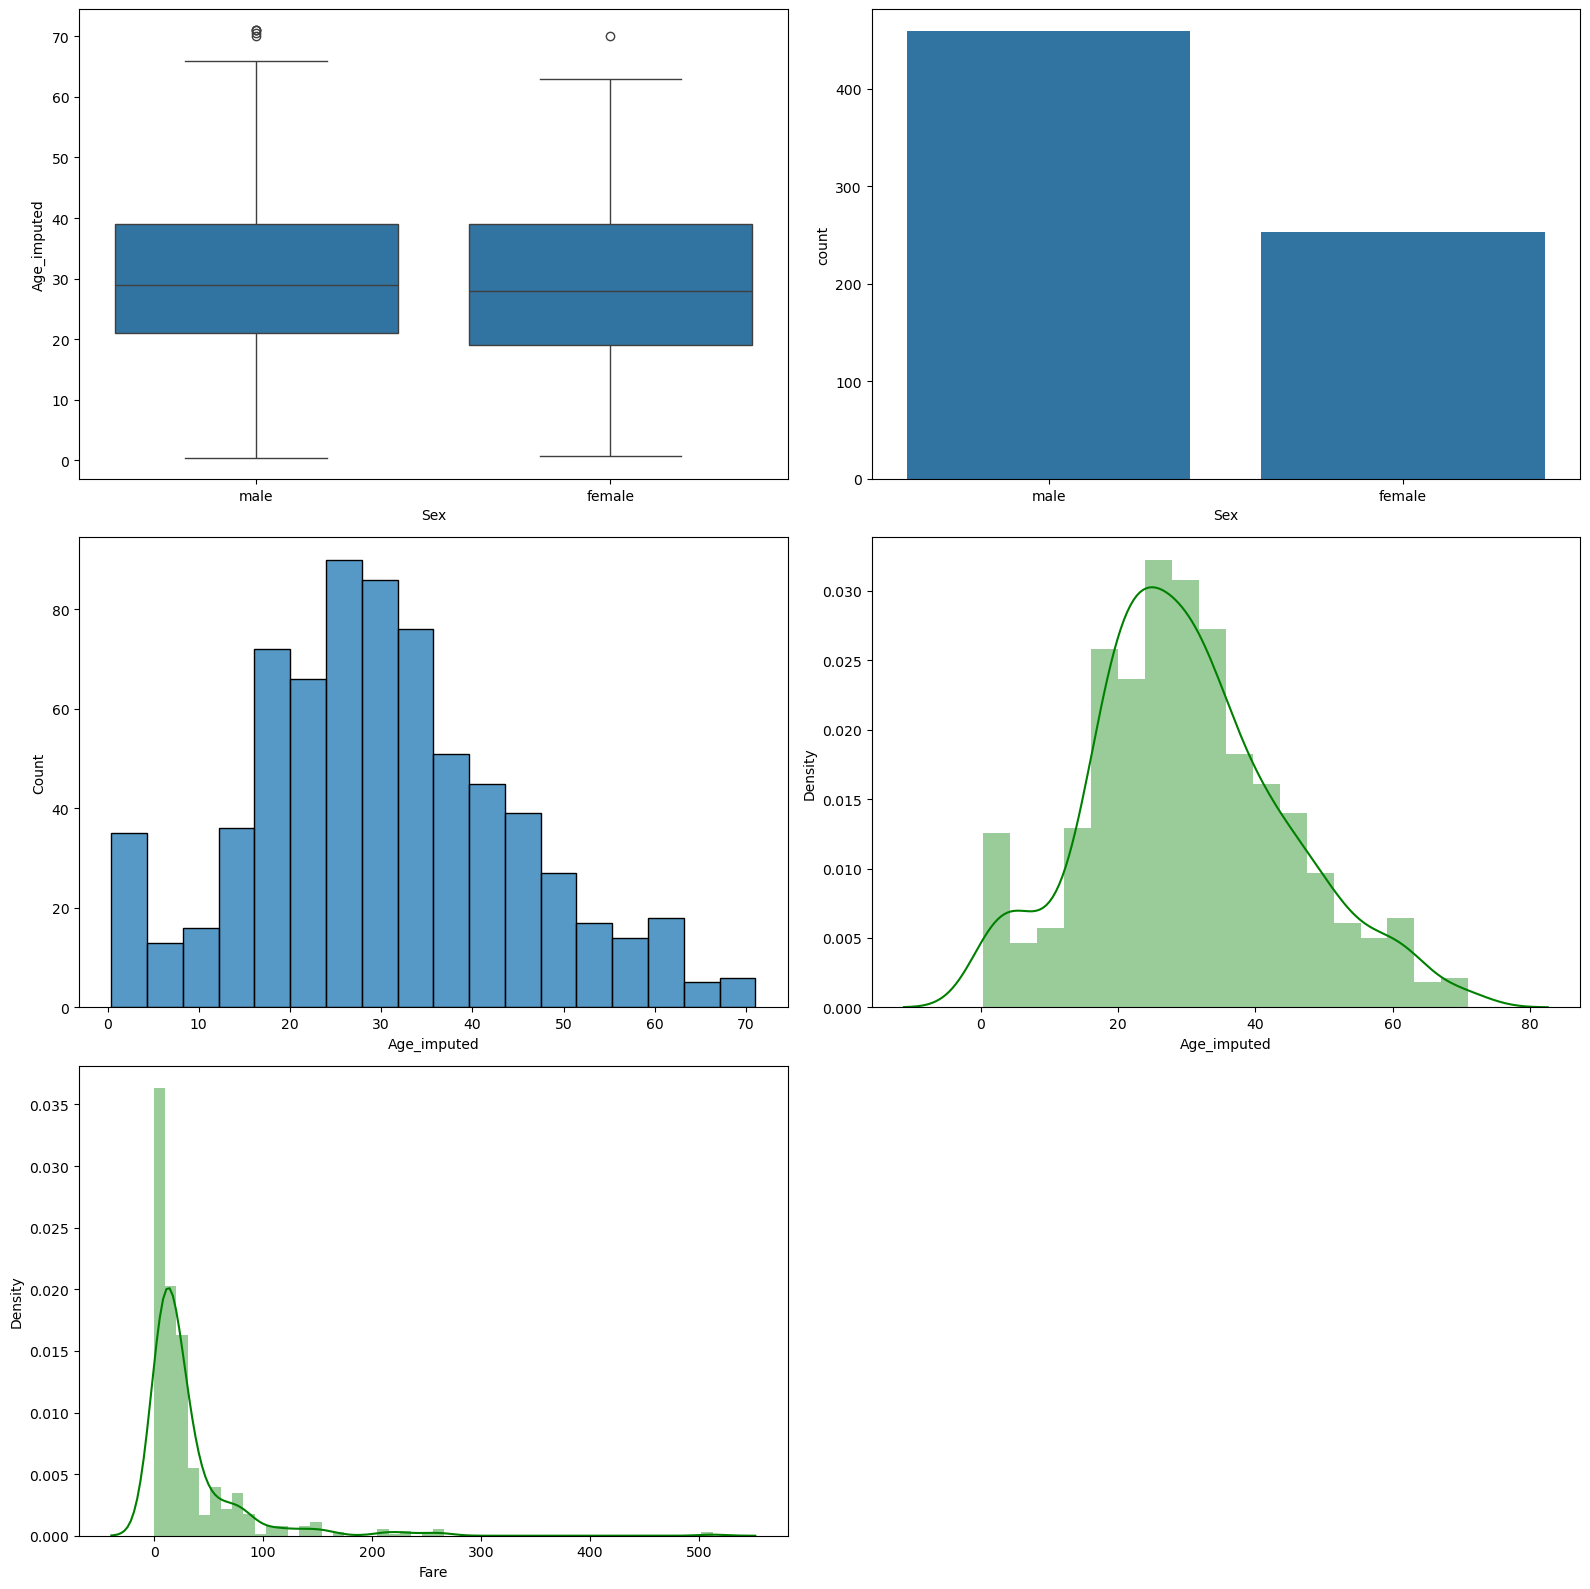

In [23]:
#data visualisation after cleaning data

plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
sns.boxplot(x = X_train['Sex'], y = X_train['Age_imputed'], data = X_train)
#male : 1 female : 0

plt.subplot(3,2,2)
sns.countplot(x='Sex', data = X_train)

plt.subplot(3,2,3)
sns.histplot(X_train['Age_imputed'])

plt.subplot(3,2,4)
sns.distplot(X_train['Age_imputed'], color = 'g')

plt.subplot(3,2,5)
sns.distplot(X_train['Fare'], color = 'g')

plt.tight_layout()
plt.show()

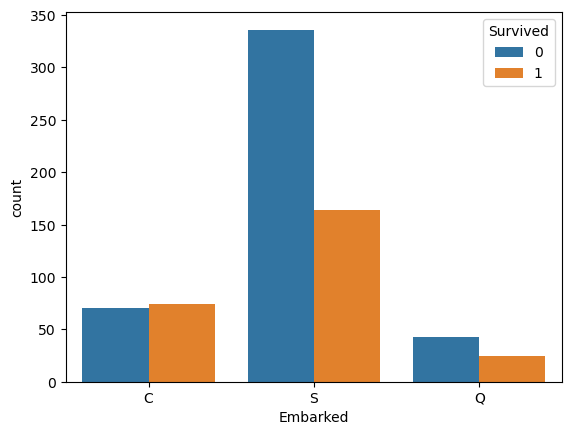

In [24]:
#Survival by Embarked Location:
sns.countplot(x='Embarked',hue=y_train,data=X_train)
plt.show()

The count plot reveals variations in survival outcomes among passengers who boarded at different ports. Notably, passengers who embarked at Cherbourg (C) appear to have a higher survival rate compared to those who embarked at Southampton (S) or Queenstown (Q).

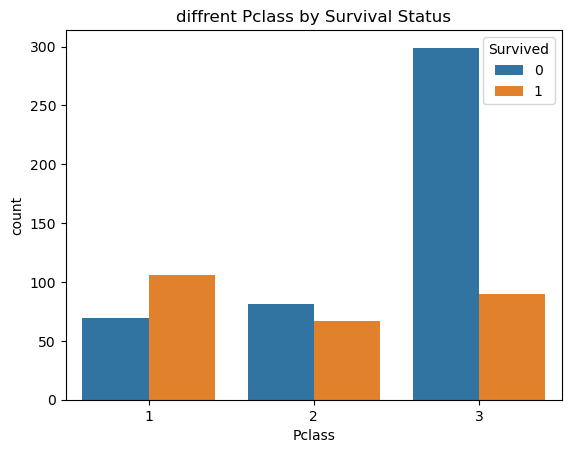

In [25]:
sns.countplot(x=X_train['Pclass'],data=X_train,hue=y_train)
legend_labels = {0: 'Not Survived', 1: 'Survived'}
plt.title('diffrent Pclass by Survival Status')
plt.show()

1. In First Class passengers, Survival rate is more.
2. In Second Class passengers, Survival rate is almost similar.
3. In Third Class passengers, Survival rate is less

In [27]:
#plt.figure(figsize=[12,8])
#sns.heatmap(X_train.corr(),annot=True)

In [28]:
y_train

30     0
10     1
873    0
182    0
876    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 712, dtype: int64

In [29]:
titanic_data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 30 to 168
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       712 non-null    int64  
 1   Name         712 non-null    object 
 2   Sex          712 non-null    object 
 3   SibSp        712 non-null    int64  
 4   Parch        712 non-null    int64  
 5   Fare         712 non-null    float64
 6   Embarked     712 non-null    object 
 7   Age_imputed  712 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 50.1+ KB


In [31]:
#Now we drop the Name columns
X_train = X_train.drop(columns = 'Name', axis = 1)

In [32]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 30 to 168
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       712 non-null    int64  
 1   Sex          712 non-null    object 
 2   SibSp        712 non-null    int64  
 3   Parch        712 non-null    int64  
 4   Fare         712 non-null    float64
 5   Embarked     712 non-null    object 
 6   Age_imputed  712 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [33]:
X_test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_imputed
707,1,"Calderhead, Mr. Edward Pennington",male,42.0,0,0,26.2875,S,42.0
37,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,8.0500,S,21.0
615,2,"Herman, Miss. Alice",female,24.0,1,2,65.0000,S,24.0
169,3,"Ling, Mr. Lee",male,28.0,0,0,56.4958,S,28.0
68,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,7.9250,S,17.0
...,...,...,...,...,...,...,...,...,...
89,3,"Celotti, Mr. Francesco",male,24.0,0,0,8.0500,S,24.0
80,3,"Waelens, Mr. Achille",male,22.0,0,0,9.0000,S,22.0
846,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,69.5500,S,8.0
870,3,"Balkic, Mr. Cerin",male,26.0,0,0,7.8958,S,26.0


In [34]:
X_test = X_test.drop(columns = ['Name', 'Age'], axis = 1)

In [35]:
X_test.isnull().sum()

Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Age_imputed    0
dtype: int64

In [36]:
#Convert the categorical columns
X_test.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace = True)

C:\Users\rajat\AppData\Local\Temp\ipykernel_9840\2643917964.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace = True)


In [37]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 707 to 251
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       179 non-null    int64  
 1   Sex          179 non-null    int64  
 2   SibSp        179 non-null    int64  
 3   Parch        179 non-null    int64  
 4   Fare         179 non-null    float64
 5   Embarked     179 non-null    int64  
 6   Age_imputed  179 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 11.2 KB


# Encoding the Categorical Columns

In [38]:
X_train['Sex'].value_counts()

Sex
male      459
female    253
Name: count, dtype: int64

In [39]:
X_train['Embarked'].value_counts()

Embarked
S    500
C    144
Q     68
Name: count, dtype: int64

In [40]:
#Convert the categorical columns
X_train.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace = True)

C:\Users\rajat\AppData\Local\Temp\ipykernel_9840\4039147094.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace = True)


In [41]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_imputed
30,1,0,0,0,27.7208,1,40.0
10,3,1,1,1,16.7000,0,4.0
873,3,0,0,0,9.0000,0,47.0
182,3,0,4,2,31.3875,0,9.0
876,3,0,0,0,9.8458,0,20.0


In [42]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 30 to 168
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       712 non-null    int64  
 1   Sex          712 non-null    int64  
 2   SibSp        712 non-null    int64  
 3   Parch        712 non-null    int64  
 4   Fare         712 non-null    float64
 5   Embarked     712 non-null    int64  
 6   Age_imputed  712 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\rajat\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

In [44]:
#acccuracy on training data
X_train_prediction = model.predict(X_train)

In [45]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 1 0 

In [46]:
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Accuracy score of training data:', training_data_accuracy)

Accuracy score of training data: 0.8160112359550562


In [47]:
#accuracy check test data
X_test_prediction = model.predict(X_test)

In [48]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [49]:
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Accuracy score of training data:', test_data_accuracy)

Accuracy score of training data: 0.770949720670391


In [ ]:
print("R2 Score", r2_score(y_test, y_pred))
print("RMSC", np.sqrt(mean_squared_error(y_test,y_pred)))

# Linear regression

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
L=LinearRegression()

In [92]:
L.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = L.predict(X_test)

In [94]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score", r2_score(y_test, y_pred))
print("RMSC", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score 0.34076445413839473
RMSC 0.4031631435819679


In [96]:
from sklearn.linear_model import Ridge
R=Ridge()

In [98]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv = GridSearchCV(R, parameters, scoring = 'neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [99]:
print(ridgecv.best_params_)

{'alpha': 2}


In [100]:
print(ridgecv.best_score_)

-0.14038997969715247


In [101]:
R=Ridge(alpha=2)

In [102]:
R.fit(X_train,y_train)

Ridge(alpha=2)

In [103]:
y_predict1 = R.predict(X_test)

In [104]:
print("R2 Score", r2_score(y_test, y_predict1))
print("RMSC", np.sqrt(mean_squared_error(y_test,y_predict1)))

R2 Score 0.3408964719680645
RMSC 0.40312277304331784
